<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/SQL/SQLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 더블쿼터 아니고 싱글이로!
SELECT ENAME||'님은 '||HIREDATE||'일에 입사했다'
FROM EMP;

SELECT 컬럼 (AS) 별칭  
FROM 테이블 별칭

In [ ]:
SELECT ENAME "사원의 이름", DEPTNO 부서번호, SAL 봉급
FROM EMP;

SELECT *
FROM EMP
WHERE ENAME='FORD';

SELECT ENAME, HIREDATE, TO_CHAR(HIREDATE, 'FMDD MONTH YYYY') T_HIREDATE,
TO_CHAR(HIREDATE, 'YYYY"년" MM"월" DD"일"') T_KOR
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

테이블 = 엔티티  
컬럼 = 속성 = Attribute

IN : =ANY  
NOT IN : !=ALL

1. AND 연산  
        BETWEEN a AND b  
        expr >= a And expr <= b  
  
2. OR 연산  
        NOT BETWEEN a AND b  
        expr < a OR expr > b  

In [ ]:
INSERT INTO TEST VALUES('HONG_GILDONG');
INSERT INTO TEST VALUES('KIM_GILDONG');
INSERT INTO TEST VALUES('B%GILDONG');
INSERT INTO TEST VALUES('BAE_GILDONG');

SELECT * FROM TEST WHERE NAME LIKE 'B%'; # B%GILDONG 리턴
SELECT * FROM TEST WHERE NAME LIKE '%!_%' ESCAPE '!'; # B%GILDONG만 리턴 안 됨

- NVL2(COLUMN, EXP1, EXP2) : NULL이면 EXP2를 리턴하고, NULL이 아니면 EXP1를 리턴
- NULLIF(EXP1, EXP2) : EXP1과 EXP2값을 비교해 같으면 NULL, 다르면 EXP1을 리턴
- COALESCE(EXP1, ..., EXPn) : EXP1, ..., EXPn 중 NULL이 아닌 첫번째 값을 리턴

In [ ]:
SELECT ENAME, SAL,
DECODE(SIGN(SAL - 1000), -1, 'A',
DECODE(SIGN(SAL - 2500), -1, 'B', 'C')) GRADE
FROM EMP;

SELECT ENAME, SAL,
CASE WHEN SAL < 1000 THEN 'A'
WHEN SAL >= 1000 AND SAL < 2500 THEN 'B'
ELSE 'C' END AS GRADE
FROM EMP;

- COUNT(*) : NULL을 포함한 행의 수
- COUNT(표현식) : 표현식의 값이 NULL을 제외한 행의 수
- AVG([DISTINCT|ALL]표현식) : NULL을 제외하고 연산
- STDDEV([DISTINCT|ALL]표현식) : NULL을 제외하고 연산
- VARIAN([DISTINCT|ALL]표현식) : NULL을 제외하고 연산
- MIN, MAX([DISTINCT|ALL]표현식) : NULL을 제외하고 연산, 문자/날짜도 사용가능

**다중행(그룹/집합/집계) 함수**
- GROUP BY : **별칭** 사용불가

**분석함수**
- JOIN이나 프로그램의 OVER HEAD를 줄임 : QUERY SPEED의 향상된 SELF-JOIN과 절차적 로직으로 표현하는 것을 NATIVE SQL에서 바로 적용
- 기존 SQL syntax를 그대로 쓰기 때문에 ANSI SQL로 채택됨
- 서브쿼리에서 사용 가능
- 중첩 불가
- ORDER BY에서 **별칭**이나 숫자 사용불가


# 모델링의 특징
1. 추상화(모형화): 다양한 현상을 일정한 형식에 맞추어 표현
2. 단순화
3. 명확화: 애매모호함을 제거

# 모델링의 세 가지 관점
1. 데이터: What
2. 프로세스: How
3. 상관: 데이터 vs 프로세스

#모델링 시 다음 3가지는 피해라
1. 중복
2. 비유연성
3. 비일관성

#모델링 3단계
1. 개념적: 높은 추상화 수준, 포괄적, 전사적
2. 논리적: Key/속성/관계 등을 정확하게 표현, 높은 재사용성
3. 물리적: 구체적

#데이터 독립성
1. 외부스키마: 개개 사용자가 보는 개인적 DB 스키마  
   ----------------------논리적 데이터 독립성------------------------
2. 개념스키마: 사용자관점을 통합, 조직 전체의 DB를 기술  
   ----------------------물리적 데이터 독립성------------------------
3. 내부스키마: 물리적

-  논리적 데이터 독립성: 개념스키마가 변경되어도 외부스키마에는 영향없음, 외부스키마가 변경되어도 개념스키마에는 영향없음  
-  물리적 데이터 독립성: 내부스키마가 변경되어도 외부/개념스키마에는 영향없음, 개념스키마가 변경되어도 내부스키마에는 영향없음

#엔터티(인스턴스의 집합)의 특징
1. 식별이 가능해야 함
2. 다른 엔터티와 최소 한 개 이상의 관계가 존재
3. 한 개의 엔터티는 2개 이상의 인스턴스(한 개의 인스턴스는 1개의 속성을 가짐)의 집합
4. 한 개의 엔터티는 2개 이상의 속성(한 개의 속성은 1개의 속성값을 가짐)을 가짐

#엔터티의 분류 -(1)유무형
1. 개념엔터티: 개념적
2. 유형엔터티: 물리적
3. 사건엔터티: 많은 발생량

#엔터티의 분류 -(2)발생시점
1. 기본/키엔터티: 부모
2. 중심엔터티: 기본엔터티로부터 발생되고 그 업무에 있어서 중심적인 역할
3. 행위엔터티: 내용이 자주 바뀜

#속성의 분류 -(1)특성
1. 기본속성
2. 설계속성: 새로 만들거나 변형한 속성
3. 파생속성: 계산된 값

#속성의 분류 -(2)엔터티 구성방식
1. PK속성: 엔터티를 식별할 수 있는 속성
2. FK속성: 다른 엔터티와의 관계에서 포함된 속성
3. 일반속성: 그 외

#도메인이란?
-  속성이 가질 수 있는 범위
-  예를들어, 학생이라는 엔터티가 있을 때 학점이라는 속성의 도메인은 0.0~4.0 사이의 실수값

#주식별자의 특징
1. 유일성
2. 최소성
3. 불변성
4. 존재성: Null 없이 값이 존재

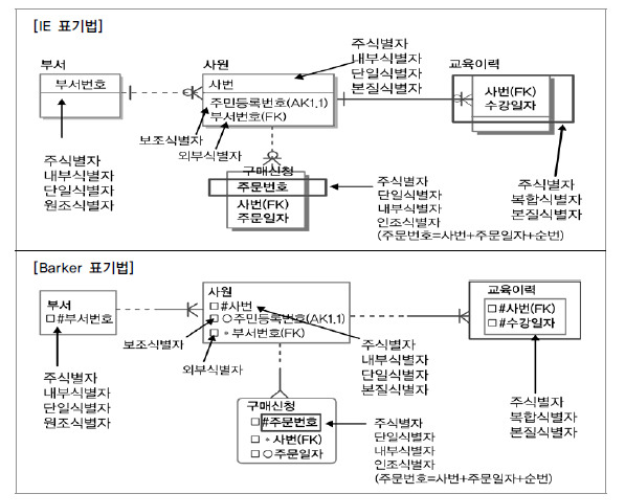

# 성능 데이터 모델링
*  분석/설계 단계에서부터 성능에 대한 설계를 하면 비용을 최소화할 수 있음
1. 정규화
2. 용량산정
3. 트랜잭션의 유형 파악
4. 용량과 트랜잭션의 유형에 따라 반정규화
5. 이력모델의 조정, PK/FK 조정, 슈퍼/서브타입 조정 등을 수행
6. 검증

# 반정규화
1. 테이블: 테이블 추가/병합/분할
2. 칼럼: 중복/파생/이력테이블/PK 칼럼 추가
3. 관계: 중복 관계 추가

# transaction을 만족하기 위한 조건
1. A 원자성: 주어진 명령이 실행되거나 실행되지 않거나 둘 중 하나
2. C 일관성 
3. I 독립성
4. D 지속성: 저장

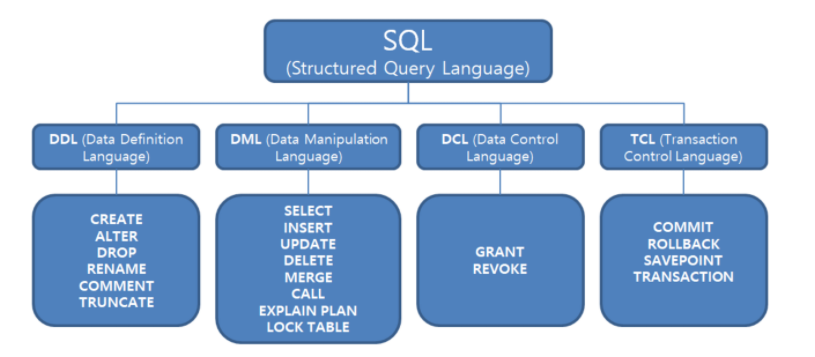

# 분산 데이터베이스의 6가지 투명성 : 병렬 아님!
- 분할투명성
- 위치투명성
- 지역투명성
- 중복(복제)투명성
- 병행투명성
- 장애투명성 
